In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
x_train.shape# 60000 image ovoru image 28x28 matrix

(60000, 28, 28)

In [8]:
y_train.shape 

(60000,)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

### PREPROCESSING TECHNIQUE 

In [11]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  #i/p 4D Array(60000,28,28,1) (so last o/p format also 4D(1x28x28x1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) #  (10000,28,28)

In [12]:
x_train.shape
# neural network model expects the input data to be in a specific format, which is a 4D array 
#with shape (N, H, W, C), where N is the number of samples, H and W are the height and width of the images, and C is the number of color channels.
#1-->grey scale image

(60000, 28, 28, 1)

In [13]:
y_test
# true class labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
y_test[1]

2

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [18]:
x_train /= 255
x_test /= 255
#x_train and x_test now have pixel values in the range of 0 to 1.

### # Define the CNN model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

#### COMPILE AND TRAIN THE MODEL

In [55]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, batch_size=100, epochs=10,validation_data=(x_test, y_test))
                                                          #actual loss-accuracy                #prediloss - accuracy

Epoch 1/10
600/600 [==============================] - 20s 33ms/step - loss: 0.0083 - accuracy: 0.9970 - val_loss: 0.0755 - val_accuracy: 0.9843
Epoch 2/10
600/600 [==============================] - 22s 37ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.0710 - val_accuracy: 0.9854
Epoch 3/10
600/600 [==============================] - 22s 36ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0659 - val_accuracy: 0.9848
Epoch 4/10
600/600 [==============================] - 22s 36ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0725 - val_accuracy: 0.9864
Epoch 5/10
600/600 [==============================] - 20s 33ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 0.0704 - val_accuracy: 0.9869
Epoch 6/10
600/600 [==============================] - 21s 36ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0728 - val_accuracy: 0.9859
Epoch 7/10
600/600 [==============================] - 21s 35ms/step - loss: 0.0070 - accuracy: 0.9975 - val_loss: 0.0732 - val_accuracy:

In [56]:
model.evaluate(x_test, y_test)                                         #test(public exam  0.06-->loss 0.98-->accuracy
#[loss,accuracy]

313/313 [==============================] - 1s 4ms/step - loss: 0.0799 - accuracy: 0.9860


[0.0798831582069397, 0.9860000014305115]

##### Evaluate the model

In [57]:
y_pred = model.predict(x_test)     #2Darray
y_pred_class = y_pred.argmax(axis=1) #convert the predicted probabilities(y_pred) into class labels.    #1Darray
y_test = y_test.reshape(-1, 1) #y_test is 1D array(10000,) convert to 2Darray
y_test_class = y_test.argmax(axis=1)                                                                   #1Darray

313/313 [==============================] - 1s 3ms/step


In [58]:
y_pred_class
#This line converts the predicted probabilities into class labels.

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [59]:
y_pred_class[1]

2

In [60]:
y_test
#This line reshapes the true labels y_test from a 1D array to a 2D array with one column.

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]], dtype=uint8)

In [61]:
y_test_class
#This line converts the reshaped y_test array into class labels.

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
conf_mat = confusion_matrix(y_test_class, y_pred_class)

In [63]:
conf_mat

array([[ 982, 1136, 1045, 1005,  991,  882,  964, 1022,  975,  998],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

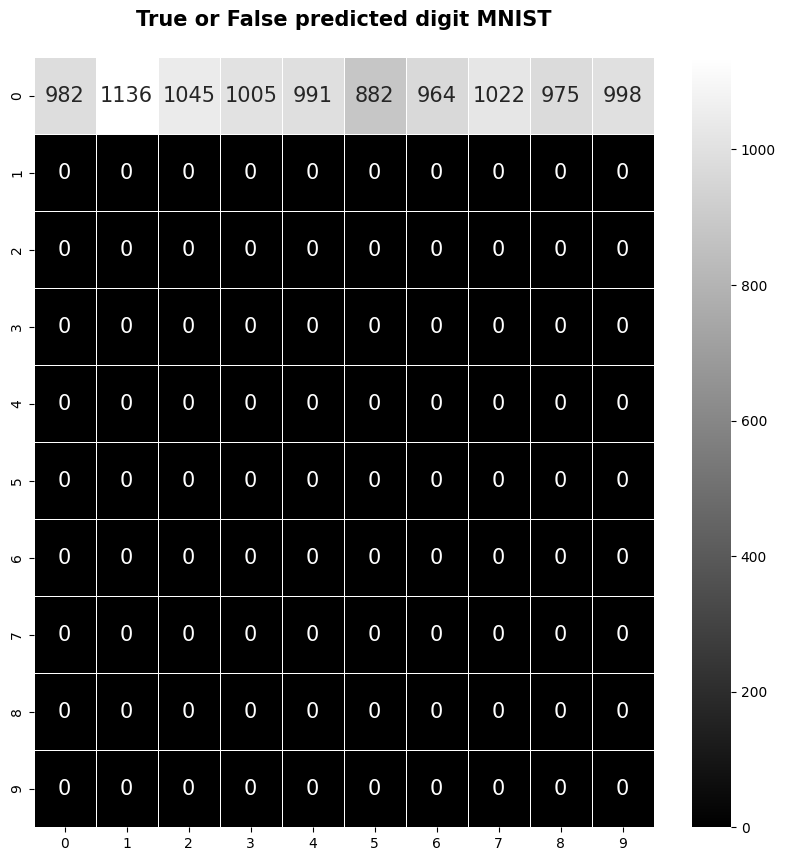

In [64]:
#Confusion matrix for CNNDigit MNIST
con_mat=confusion_matrix(y_test_class,y_pred_class)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [65]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test_class, y_pred_class)

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.10      0.18     10000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     10000
   macro avg       0.10      0.01      0.02     10000
weighted avg       1.00      0.10      0.18     10000



1/1 [==============================] - 0s 5ms/step
2


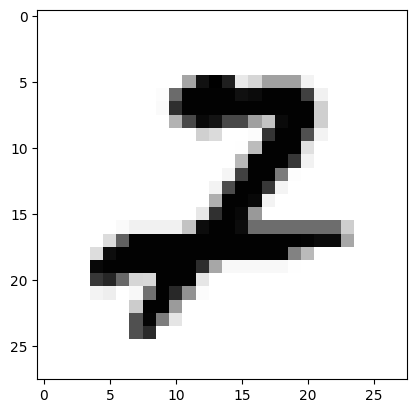

In [67]:
import matplotlib.pyplot as plt
image_index = 9009
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))#(no of sample at a time,height,width,greyscale) i/p 4D la dhan so here also 4D
print(pred.argmax())
#reshape the input data into a 4D array with dimensions 1x28x28x1, which is the input format for the neural network model.

### SO MANY TIMES READ(FEED FORWRD & BACK PROPOGATION ) SEE THE ACCURACY FOR EPOCH FROM HISTORY

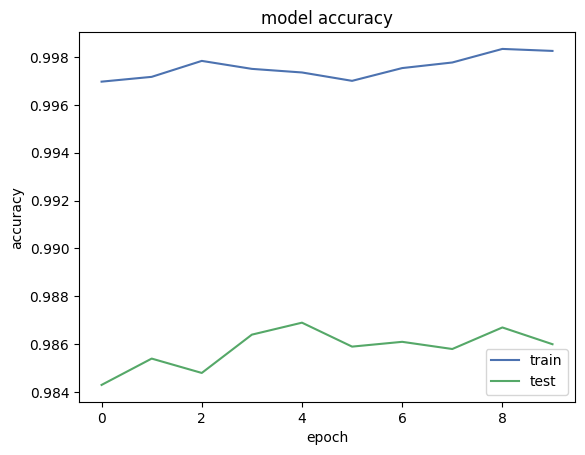

In [69]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

plt.show()

#Acuracy always from Decreasing to Increasing level(more train and test gives good result)

### GRAPH FOR LOSS FUNCTION (GRAPH LINES HIGHEST TO LOWEST-- MISTAKES IS MORE END IT WILL BE LOW)

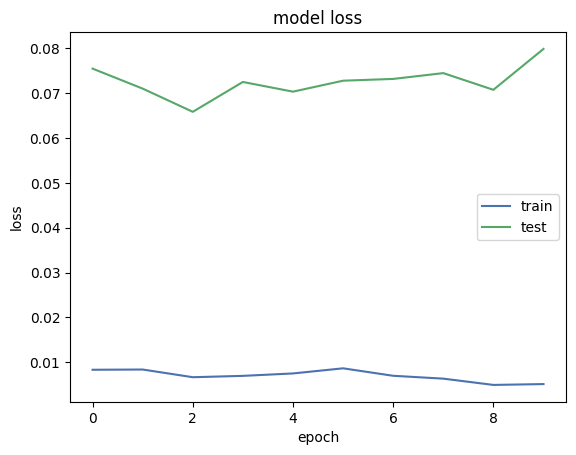

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()